### Import Libraries

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For visualization

### Load the dataset

In [2]:
# Load data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### EDA

In [5]:
# Print basic info about the data
print(X.describe())  # Summary statistics
print(X.head())      # View first few rows


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [6]:
# Check for missing values
print("Missing values:", X.isnull().sum())

Missing values: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


### Data Visualization

C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


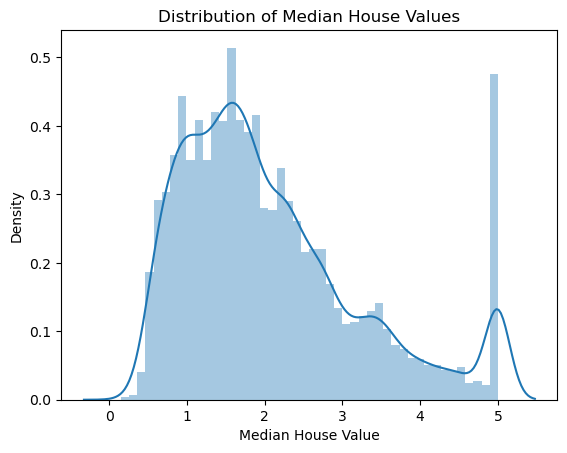

In [7]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable (median house value)
sns.distplot(y)
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Distribution of Median House Values")
plt.show()

### Standardization

In [8]:
# Data Preprocessing
# Scale features (SVM regressor is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Data Split

In [9]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Train SVM

In [10]:
# Train the SVM Regressor
svr = SVR(kernel='rbf')  # Experiment with 'linear' or other kernels
svr.fit(X_train, y_train)


SVR()

In [11]:
# Make Predictions and Evaluate Performance
y_pred = svr.predict(X_test)


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.3551984619989417
R-squared: 0.7289407597956463


### Hyperparameters of SVM

1. Kernel:

Function: The kernel function defines how the SVM maps the input data into a higher-dimensional feature space. This allows the model to learn more complex relationships between features.
Common Choices:
Linear: Suitable for linearly separable data. Efficient for large datasets.

Polynomial: Can capture non-linear relationships. Adjust the degree of the polynomial for more flexibility but risk overfitting with high degrees.

RBF (Radial Basis Function): A versatile kernel that can handle both linear and non-linear relationships. The gamma parameter controls the influence of each data point.

Sigmoid: Another option for non-linear data, but can be computationally expensive.

Impact: Choosing the right kernel significantly affects the model's ability to learn complex patterns in the data. Experiment with different kernels to see which one performs best for your specific dataset.

2. C (Regularization Parameter):

Function: Controls the trade-off between fitting the training data and avoiding overfitting. A higher C value penalizes larger margins, leading to a stricter fit (potentially overfitting) and a lower C value allows for a more flexible margin (potentially underfitting).

Range: Experiment with a range of values, typically starting from small values (e.g., 0.01) and increasing in magnitude (e.g., 1, 10, 100).

Impact: A good C value helps prevent the model from memorizing the training data too closely, allowing it to generalize better to unseen data.

3. Epsilon (Epsilon-SVR):

Function: Applicable to SVR (Support Vector Regression) models. It specifies the tolerance for deviations from the ideal hyperplane (in regression problems).

Range: Experiment with small non-negative values (e.g., 0.001, 0.01).

Impact: A smaller epsilon allows for a stricter fit to the training data, potentially leading to overfitting. A larger epsilon allows for more flexibility but might underfit the data.

4. Gamma (RBF Kernel):

Function: Specific to the RBF kernel. It controls the influence of each data point in the kernel function.

Range: Experiment with a range of values, typically starting from small values and increasing in magnitude.

Impact: A higher gamma value increases the influence of nearby data points, leading to a more complex decision boundary. A lower gamma value reduces the influence of nearby points, resulting in a smoother decision boundary.

5. Degree (Polynomial Kernel):

Function: Specific to the polynomial kernel. It controls the degree of the polynomial used for mapping the data.

Range: Experiment with a range of integer values, starting from low values (e.g., 2, 3) and increasing cautiously.

Impact: A higher degree allows for more complex non-linear relationships but increases the risk of overfitting. A lower degree limits complexity but might not capture necessary non-linearities.

6. Cache Size:

Function: Controls the amount of memory allocated to store kernel computations during training.

Range: Experiment with different memory sizes depending on your available resources.

Impact: A larger cache size can improve performance for large datasets but might require more memory. A smaller cache size might be slower for large datasets but uses less memory.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR



# Define a parameter grid to explore
param_grid = {
    'kernel': ['linear', 'rbf'],  # Experiment with different kernels
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Gamma for RBF kernel (optional)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model for prediction and evaluation
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Best Hyperparameters:", best_params)